# PROJECT FOR FUNDAMENTALS OF DATA ANALYSIS

## IRIS FLOWER DATASET
## Author : Michael Allen

## PURPOSE : 
The purpose of the project is to create a notebook investigating the variables and data points within the well-known iris flower data set associated with Ronald A Fisher.

## INTRODUCTION
Fisher's Iris data set is a multivariate data set introduced by Ronald Fisher in 1936, as an example of linear discriminant analysis i.e. a method used in statistics to find a linear combination of features that characterizes or separates two or more classes of objects or events. In this study, Fisher wished to investigate if the species of an Iris flower could be identified by examining its petal and sepal length and width.

## Import the python libraries

In [52]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import re
import fileinput
import random

## ABOUT THE DATA SET

### Read the iris.csv file

In [53]:
print("             FUNDAMENTALS OF DATA ANALYSIS PROJECT")
filename = "iris.csv"
# https://www.geeksforgeeks.org/python-basics-of-pandas-using-iris-dataset/
iris = pd.read_csv('./data/iris.csv')
sys.stdout = open('./data/output.txt','wt')
print()
print("5 COLUMNS")
print(iris.columns)
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### The Iris dataset contains 5 columns

In [54]:
print()
print("The Iris Data Set")
print(iris)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Add 4 columns to the iris dataframe
- sl*sw = sepal_length * sepal_width
- pl/pw = petal_length / petal_width
- sl+sw = sepal_length + sepal_width
- pl-pw = petal_length - petal_width

In [55]:
iris_columns = ['sepal_length', 'sepal_width' , 'petal_length', 'petal_width', 'species']
iris['sl*sw'] = iris['sepal_length'] * iris['sepal_width']
iris['pl/pw'] = iris['petal_length'] / iris['petal_width']
iris['sl+sw'] = iris['sepal_length'] + iris['sepal_width']
iris['pl-pw'] = iris['petal_length'] - iris['petal_width']
#iris['sl/sw'] = iris[int('sepal_length')] ^ iris[int('sepal_width')]
iris_columns = ['sepal_length', 'sepal_width' , 'petal_length', 'petal_width', 'species', 'sl*sw', 'pl/pw', 'sl+sw', 'pl-pw']
print()
print("9 COLUMNS")
print(iris.columns)
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'sl*sw', 'pl/pw', 'sl+sw', 'pl-pw'],
      dtype='object')

In [56]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-columns/
print(iris)
iris

,sepal_length,sepal_width,petal_length,petal_width,species,sl*sw,pl/pw,sl+sw,pl-pw
0,5.1,3.5,1.4,0.2,setosa,17.85,7.000000,8.6,1.2
1,4.9,3.0,1.4,0.2,setosa,14.70,7.000000,7.9,1.2
2,4.7,3.2,1.3,0.2,setosa,15.04,6.500000,7.9,1.1
3,4.6,3.1,1.5,0.2,setosa,14.26,7.500000,7.7,1.3
4,5.0,3.6,1.4,0.2,setosa,18.00,7.000000,8.6,1.2
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,20.10,2.260870,9.7,2.9
146,6.3,2.5,5.0,1.9,virginica,15.75,2.631579,8.8,3.1
147,6.5,3.0,5.2,2.0,virginica,19.50,2.600000,9.5,3.2
148,6.2,3.4,5.4,2.3,virginica,21.08,2.347826,9.6,3.1


### PETAL LENGTH DIVIDED BY PETAL WIDTH

In [57]:
print("PETAL LENGTH DIVIDED BY PETAL WIDTH")
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html
print()
print(iris["pl/pw"].head(5))
iris["pl/pw"].head(5)

0    7.0
1    7.0
2    6.5
3    7.5
4    7.0
Name: pl/pw, dtype: float64

### Data Shape : Numbers of rows and columns

In [58]:
print("Data Shape : Numbers of rows and columns")
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html
print()
print(iris.shape)
iris.shape

(150, 9)

### SELECT ROWS

In [59]:
print("ROWS 65 to 70")
#I only printed rows 65 to 70. All other rows were ignored. https://realpython.com/python-print/
print()
print(iris[65:71])
iris[65:71]

,sepal_length,sepal_width,petal_length,petal_width,species,sl*sw,pl/pw,sl+sw,pl-pw
65,6.7,3.1,4.4,1.4,versicolor,20.77,3.142857,9.8,3.0
66,5.6,3.0,4.5,1.5,versicolor,16.80,3.000000,8.6,3.0
67,5.8,2.7,4.1,1.0,versicolor,15.66,4.100000,8.5,3.1
68,6.2,2.2,4.5,1.5,versicolor,13.64,3.000000,8.4,3.0
69,5.6,2.5,3.9,1.1,versicolor,14.00,3.545455,8.1,2.8
70,5.9,3.2,4.8,1.8,versicolor,18.88,2.666667,9.1,3.0


In [60]:
print("ROWS 100 to 105")
# Print ROWS 100 to 105 All other rows were ignored.
print()
sliced_data=iris[100:106]
print(sliced_data)
sliced_data

,sepal_length,sepal_width,petal_length,petal_width,species,sl*sw,pl/pw,sl+sw,pl-pw
100,6.3,3.3,6.0,2.5,virginica,20.79,2.400000,9.6,3.5
101,5.8,2.7,5.1,1.9,virginica,15.66,2.684211,8.5,3.2
102,7.1,3.0,5.9,2.1,virginica,21.30,2.809524,10.1,3.8
103,6.3,2.9,5.6,1.8,virginica,18.27,3.111111,9.2,3.8
104,6.5,3.0,5.8,2.2,virginica,19.50,2.636364,9.5,3.6
105,7.6,3.0,6.6,2.1,virginica,22.80,3.142857,10.6,4.5


### SUMMARY OF DATA

In [61]:
print("                                         SUMMARY OF DATA : ")
#The following statistical data is calculated: count, mean, std, min, 25%, 50%, 75% and max Count : Number of rows Mean: Average Std: Standard Deviation 25% : Twenty Five percent 50% : Fifty percent 75% : Seventy five percent Min: Minimum Max : Maximum
print()
summary = iris.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.300,5.100000,5.80,6.400000,7.90
sepal_width,150.0,3.054000,0.433594,2.000,2.800000,3.00,3.300000,4.40
petal_length,150.0,3.758667,1.764420,1.000,1.600000,4.35,5.100000,6.90
petal_width,150.0,1.198667,0.763161,0.100,0.300000,1.30,1.800000,2.50
sl*sw,150.0,17.806533,3.368693,10.000,15.645000,17.66,20.325000,30.02
pl/pw,150.0,4.367166,2.651508,2.125,2.802381,3.30,4.666667,15.00
sl+sw,150.0,8.897333,0.891718,6.800,8.300000,8.85,9.575000,11.70
pl-pw,150.0,2.560000,1.050152,0.800,1.400000,2.90,3.300000,4.70


In [62]:
#https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html?highlight=summary
print(summary)
print()

### Define each species in the dataset

In [63]:
# https://github.com/gabrielmulligan/fishersirisdataset/blob/master/fisher_scatterplot.py
# print a statistical summary by Species
# Firstly, define each species in the dataset i.e. how Python knows which of the three Iris varieties it is
setosa =iris[iris['species']=='setosa']
versicolor =iris[iris['species']=='versicolor']
virginica =iris[iris['species']=='virginica']

## ANALYSIS SECTION

### Summary Statistical Analysis - Iris Setosa

In [64]:
# print a statistical summary using the describe function
print ("")
print ("                            Summary Statistical Analysis - Iris Setosa")
print(setosa.describe())
print ("")
setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width,sl*sw,pl/pw,sl+sw,pl-pw
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,5.00600,3.418000,1.464000,0.24400,17.208800,7.078000,8.424000,1.220000
std,0.35249,0.381024,0.173511,0.10721,2.947688,3.123779,0.685583,0.173793
min,4.30000,2.300000,1.000000,0.10000,10.350000,2.666667,6.800000,0.800000
25%,4.80000,3.125000,1.400000,0.20000,15.040000,4.687500,7.925000,1.100000
50%,5.00000,3.400000,1.500000,0.20000,17.000000,7.000000,8.400000,1.200000
75%,5.20000,3.675000,1.575000,0.30000,19.155000,7.875000,8.875000,1.375000
max,5.80000,4.400000,1.900000,0.60000,25.080000,15.000000,10.100000,1.700000


### Summary Statistical Analysis - Iris Versicolor

In [65]:
print ("                            Summary Statistical Analysis - Iris Versicolor")
print(versicolor.describe())
print ("")
versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width,sl*sw,pl/pw,sl+sw,pl-pw
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000,16.526200,3.242837,8.706000,2.934000
std,0.516171,0.313798,0.469911,0.197753,2.866882,0.312456,0.731621,0.337222
min,4.900000,2.000000,3.000000,1.000000,10.000000,2.666667,7.000000,1.900000
25%,5.600000,2.525000,4.000000,1.200000,14.347500,3.016667,8.300000,2.700000
50%,5.900000,2.800000,4.350000,1.300000,16.385000,3.240385,8.600000,3.000000
75%,6.300000,3.000000,4.600000,1.500000,18.495000,3.417582,9.250000,3.175000
max,7.000000,3.400000,5.100000,1.800000,22.400000,4.100000,10.200000,3.500000


### Summary Statistical Analysis - Iris Virginica

In [66]:
print ("                            Summary Statistical Analysis - Iris Virginica")
print(virginica.describe())
print ("")
virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width,sl*sw,pl/pw,sl+sw,pl-pw
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.00000,50.000000
mean,6.58800,2.974000,5.552000,2.02600,19.684600,2.780662,9.56200,3.526000
std,0.63588,0.322497,0.551895,0.27465,3.458783,0.407367,0.83419,0.531386
min,4.90000,2.200000,4.500000,1.40000,12.250000,2.125000,7.40000,2.700000
25%,6.22500,2.800000,5.100000,1.80000,17.430000,2.511364,9.02500,3.100000
50%,6.50000,3.000000,5.550000,2.00000,20.060000,2.666667,9.60000,3.400000
75%,6.90000,3.175000,5.875000,2.30000,21.412500,3.055556,10.07500,3.800000
max,7.90000,3.800000,6.900000,2.50000,30.020000,4.000000,11.70000,4.700000


### THE FIRST 10 ROWS

In [67]:
print("                                         THE FIRST 10 ROWS : ")
print(iris[iris_columns].head(11))
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head
#I printed the head of the dataset to the ouput file. All other rows were ignored.
print()
iris[iris_columns].head(11)

,sepal_length,sepal_width,petal_length,petal_width,species,sl*sw,pl/pw,sl+sw,pl-pw
0,5.1,3.5,1.4,0.2,setosa,17.85,7.000000,8.6,1.2
1,4.9,3.0,1.4,0.2,setosa,14.70,7.000000,7.9,1.2
2,4.7,3.2,1.3,0.2,setosa,15.04,6.500000,7.9,1.1
3,4.6,3.1,1.5,0.2,setosa,14.26,7.500000,7.7,1.3
4,5.0,3.6,1.4,0.2,setosa,18.00,7.000000,8.6,1.2
5,5.4,3.9,1.7,0.4,setosa,21.06,4.250000,9.3,1.3
6,4.6,3.4,1.4,0.3,setosa,15.64,4.666667,8.0,1.1
7,5.0,3.4,1.5,0.2,setosa,17.00,7.500000,8.4,1.3
8,4.4,2.9,1.4,0.2,setosa,12.76,7.000000,7.3,1.2
9,4.9,3.1,1.5,0.1,setosa,15.19,15.000000,8.0,1.4


### THE LAST 10 ROWS

In [68]:
print("                                         THE LAST 10 ROWS : ")
print(iris[iris_columns].tail(10))
#I printed the tail of the dataset to the ouput file. All other rows were ignored.
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail
print()
iris[iris_columns].tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species,sl*sw,pl/pw,sl+sw,pl-pw
140,6.7,3.1,5.6,2.4,virginica,20.77,2.333333,9.8,3.2
141,6.9,3.1,5.1,2.3,virginica,21.39,2.217391,10.0,2.8
142,5.8,2.7,5.1,1.9,virginica,15.66,2.684211,8.5,3.2
143,6.8,3.2,5.9,2.3,virginica,21.76,2.565217,10.0,3.6
144,6.7,3.3,5.7,2.5,virginica,22.11,2.280000,10.0,3.2
145,6.7,3.0,5.2,2.3,virginica,20.10,2.260870,9.7,2.9
146,6.3,2.5,5.0,1.9,virginica,15.75,2.631579,8.8,3.1
147,6.5,3.0,5.2,2.0,virginica,19.50,2.600000,9.5,3.2
148,6.2,3.4,5.4,2.3,virginica,21.08,2.347826,9.6,3.1
149,5.9,3.0,5.1,1.8,virginica,17.70,2.833333,8.9,3.3


### RANDOM SAMPLE OF 10 ROWS

In [69]:
print("                                         RANDOM SAMPLE OF 10 ROWS : ")
print(iris.sample(10))
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html?highlight=sample#pandas.DataFrame.sample
#I printed a random sample of 10 rows. I called the pandas function sample()
print()
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,sl*sw,pl/pw,sl+sw,pl-pw
38,4.4,3.0,1.3,0.2,setosa,13.20,6.500000,7.4,1.1
131,7.9,3.8,6.4,2.0,virginica,30.02,3.200000,11.7,4.4
119,6.0,2.2,5.0,1.5,virginica,13.20,3.333333,8.2,3.5
147,6.5,3.0,5.2,2.0,virginica,19.50,2.600000,9.5,3.2
72,6.3,2.5,4.9,1.5,versicolor,15.75,3.266667,8.8,3.4
128,6.4,2.8,5.6,2.1,virginica,17.92,2.666667,9.2,3.5
80,5.5,2.4,3.8,1.1,versicolor,13.20,3.454545,7.9,2.7
41,4.5,2.3,1.3,0.3,setosa,10.35,4.333333,6.8,1.0
103,6.3,2.9,5.6,1.8,virginica,18.27,3.111111,9.2,3.8
75,6.6,3.0,4.4,1.4,versicolor,19.80,3.142857,9.6,3.0


### THE MEAN OF EACH SPECIES

In [70]:
print("                                         THE MEAN OF EACH SPECIES : ")
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby
mean = iris.groupby('species').mean()
print(mean)
mean

,sepal_length,sepal_width,petal_length,petal_width,sl*sw,pl/pw,sl+sw,pl-pw
species,,,,,,,,
setosa,5.006,3.418,1.464,0.244,17.2088,7.078000,8.424,1.220
versicolor,5.936,2.770,4.260,1.326,16.5262,3.242837,8.706,2.934
virginica,6.588,2.974,5.552,2.026,19.6846,2.780662,9.562,3.526


### THE STANDARD DEVIATION OF EACH SPECIES

In [71]:
print("                                         THE STANDARD DEVIATION OF EACH SPECIES : ")
#I grouped the dataset by species and calculated the standard deviation of each group.
std = iris.groupby('species').std()
#https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.std.html?highlight=std#pandas.core.groupby.DataFrameGroupBy.std
print(std)
print()
std

,sepal_length,sepal_width,petal_length,petal_width,sl*sw,pl/pw,sl+sw,pl-pw
species,,,,,,,,
setosa,0.352490,0.381024,0.173511,0.107210,2.947688,3.123779,0.685583,0.173793
versicolor,0.516171,0.313798,0.469911,0.197753,2.866882,0.312456,0.731621,0.337222
virginica,0.635880,0.322497,0.551895,0.274650,3.458783,0.407367,0.834190,0.531386


### THE MEDIAN OF EACH SPECIES

In [72]:
print("                                         THE MEDIAN OF EACH SPECIES : ")
#https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.median.html?highlight=median#pandas.core.groupby.DataFrameGroupBy.median
median = iris.groupby('species').median()
#I grouped the dataset by species and calculated the median of each group.
print(median)
print()
median

,sepal_length,sepal_width,petal_length,petal_width,sl*sw,pl/pw,sl+sw,pl-pw
species,,,,,,,,
setosa,5.0,3.4,1.50,0.2,17.000,7.000000,8.4,1.2
versicolor,5.9,2.8,4.35,1.3,16.385,3.240385,8.6,3.0
virginica,6.5,3.0,5.55,2.0,20.060,2.666667,9.6,3.4


### THE MAX OF EACH SPECIES

In [73]:
print("                                         THE MAX OF EACH SPECIES : ")

#https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.max.html?highlight=max#pandas.core.groupby.DataFrameGroupBy.max
max = iris.groupby('species').max()
print(max)
#I grouped the dataset by species and calculated the maximum of each group.
print()
max

,sepal_length,sepal_width,petal_length,petal_width,sl*sw,pl/pw,sl+sw,pl-pw
species,,,,,,,,
setosa,5.8,4.4,1.9,0.6,25.08,15.0,10.1,1.7
versicolor,7.0,3.4,5.1,1.8,22.40,4.1,10.2,3.5
virginica,7.9,3.8,6.9,2.5,30.02,4.0,11.7,4.7


### THE MIN OF EACH SPECIES

In [74]:
print("                                         THE MIN OF EACH SPECIES : ")
min = iris.groupby('species').min()
#https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.min.html?highlight=min#pandas.core.groupby.DataFrameGroupBy.min
print(min)
#I grouped the dataset by species and calculated the maximum of each group.
print()
min

,sepal_length,sepal_width,petal_length,petal_width,sl*sw,pl/pw,sl+sw,pl-pw
species,,,,,,,,
setosa,4.3,2.3,1.0,0.1,10.35,2.666667,6.8,0.8
versicolor,4.9,2.0,3.0,1.0,10.00,2.666667,7.0,1.9
virginica,4.9,2.2,4.5,1.4,12.25,2.125000,7.4,2.7


### THE SUM OF EACH SPECIES BY COLUMN

In [75]:
print("                                         THE SUM OF EACH SPECIES : ")
sum = iris.groupby('species').sum()
#I grouped the dataset by species and calculated the sum of each group.
print(sum)
#https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.sum.html?highlight=sum#pandas.core.groupby.DataFrameGroupBy.sum
print()
sum

,sepal_length,sepal_width,petal_length,petal_width,sl*sw,pl/pw,sl+sw,pl-pw
species,,,,,,,,
setosa,250.3,170.9,73.2,12.2,860.44,353.900000,421.2,61.0
versicolor,296.8,138.5,213.0,66.3,826.31,162.141847,435.3,146.7
virginica,329.4,148.7,277.6,101.3,984.23,139.033117,478.1,176.3


### THE SUM TOTAL OF SEPAL LENGTH COLUMN

In [76]:
#https://www.w3schools.com/python/pandas/ref_df_sum.asp
sum = iris['sepal_length'].sum()
print("THE SUM TOTAL OF SEPAL LENGTH COLUMN : ")
print(sum)
sum

876.5

### THE SUM TOTAL OF SEPAL WIDTH COLUMN

In [77]:
#I I calculated the sum total of the sepal length column
print(sum)
sum = iris['sepal_width'].sum()
#I calculated the sum of the sepal width column
print("THE SUM TOTAL OF SEPAL WIDTH COLUMN : ")
print(sum)
sum

458.1

### THE SUM TOTAL OF PETAL LENGTH COLUMN

In [78]:
sum = iris['petal_length'].sum()
#I calculated the sum of the petal length column
print("THE SUM TOTAL OF PETAL LENGTH COLUMN : ")
print(sum)
sum

563.8

### THE SUM TOTAL OF PETAL WIDTH COLUMN

In [79]:
sum = iris['petal_width'].sum()
print("THE SUM TOTAL OF PETAL WIDTH COLUMN  : ")
#I calculated the sum of the petal width column
print(sum)
print()
print(sum)
sum

179.8

### iloc : ROWS 140 - 149

In [80]:
print("                                         ROWS 140 - 149 : ") 
print(iris.iloc[146:151])
#https://www.w3schools.com/python/pandas/ref_df_iloc.asp
#I called the panndas iloc function to select rows 140 - 150
print()
iris.iloc[140:150]

,sepal_length,sepal_width,petal_length,petal_width,species,sl*sw,pl/pw,sl+sw,pl-pw
140,6.7,3.1,5.6,2.4,virginica,20.77,2.333333,9.8,3.2
141,6.9,3.1,5.1,2.3,virginica,21.39,2.217391,10.0,2.8
142,5.8,2.7,5.1,1.9,virginica,15.66,2.684211,8.5,3.2
143,6.8,3.2,5.9,2.3,virginica,21.76,2.565217,10.0,3.6
144,6.7,3.3,5.7,2.5,virginica,22.11,2.280000,10.0,3.2
145,6.7,3.0,5.2,2.3,virginica,20.10,2.260870,9.7,2.9
146,6.3,2.5,5.0,1.9,virginica,15.75,2.631579,8.8,3.1
147,6.5,3.0,5.2,2.0,virginica,19.50,2.600000,9.5,3.2
148,6.2,3.4,5.4,2.3,virginica,21.08,2.347826,9.6,3.1
149,5.9,3.0,5.1,1.8,virginica,17.70,2.833333,8.9,3.3


## PLOTS

array([[<AxesSubplot:title={'center':'petal_length'}>]], dtype=object)

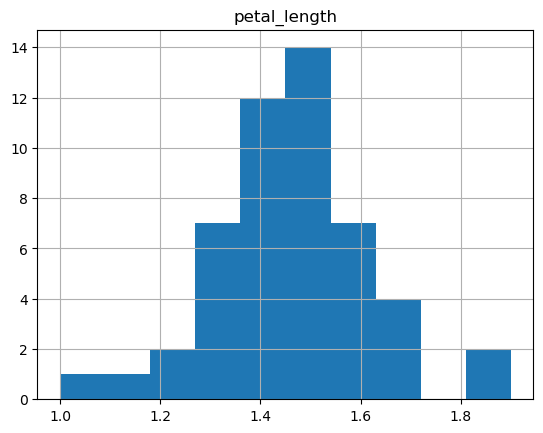

In [81]:
setosa.hist('petal_length')

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>,
        <AxesSubplot:title={'center':'petal_length'}>],
       [<AxesSubplot:title={'center':'petal_width'}>,
        <AxesSubplot:title={'center':'sl*sw'}>,
        <AxesSubplot:title={'center':'pl/pw'}>],
       [<AxesSubplot:title={'center':'sl+sw'}>,
        <AxesSubplot:title={'center':'pl-pw'}>, <AxesSubplot:>]],
      dtype=object)

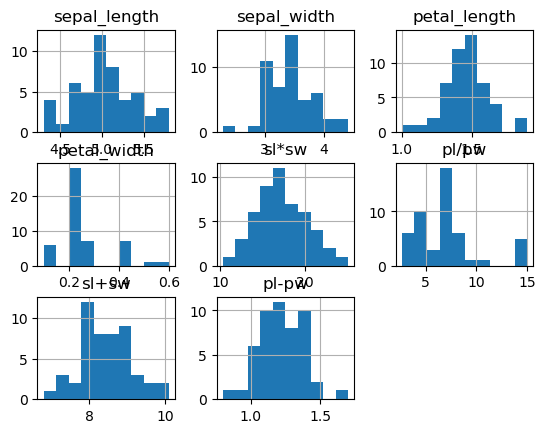

In [82]:
setosa.hist()

array([[<AxesSubplot:title={'center':'sepal_width'}>]], dtype=object)

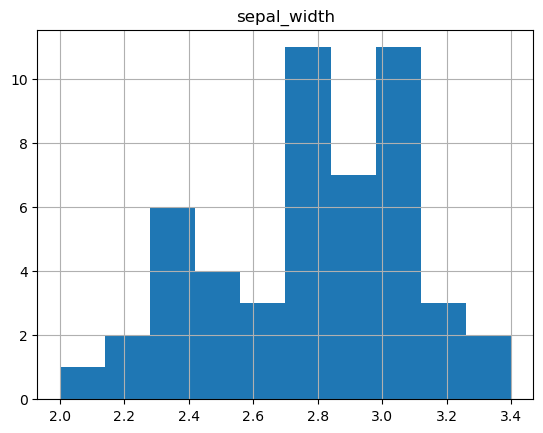

In [83]:
versicolor.hist('sepal_width')

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>,
        <AxesSubplot:title={'center':'petal_length'}>],
       [<AxesSubplot:title={'center':'petal_width'}>,
        <AxesSubplot:title={'center':'sl*sw'}>,
        <AxesSubplot:title={'center':'pl/pw'}>],
       [<AxesSubplot:title={'center':'sl+sw'}>,
        <AxesSubplot:title={'center':'pl-pw'}>, <AxesSubplot:>]],
      dtype=object)

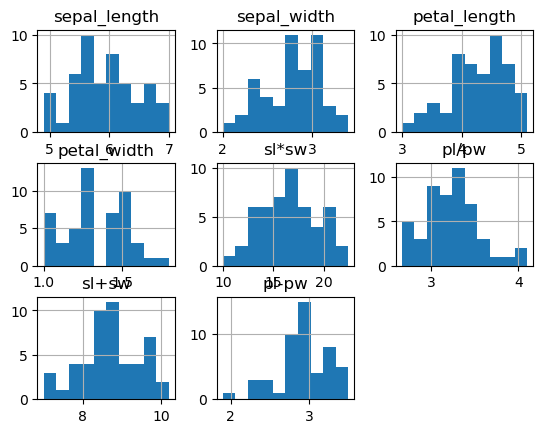

In [84]:
versicolor.hist()

array([[<AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

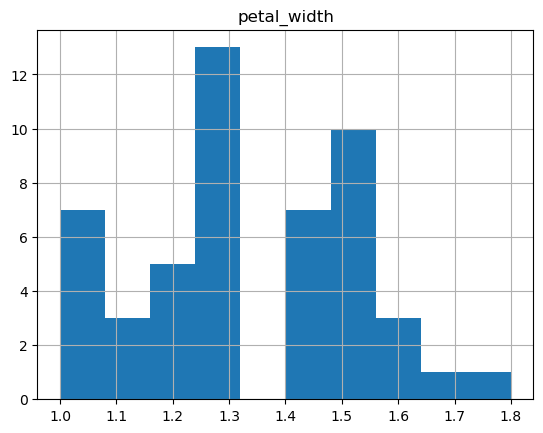

In [85]:
versicolor.hist('petal_width')

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>,
        <AxesSubplot:title={'center':'petal_length'}>],
       [<AxesSubplot:title={'center':'petal_width'}>,
        <AxesSubplot:title={'center':'sl*sw'}>,
        <AxesSubplot:title={'center':'pl/pw'}>],
       [<AxesSubplot:title={'center':'sl+sw'}>,
        <AxesSubplot:title={'center':'pl-pw'}>, <AxesSubplot:>]],
      dtype=object)

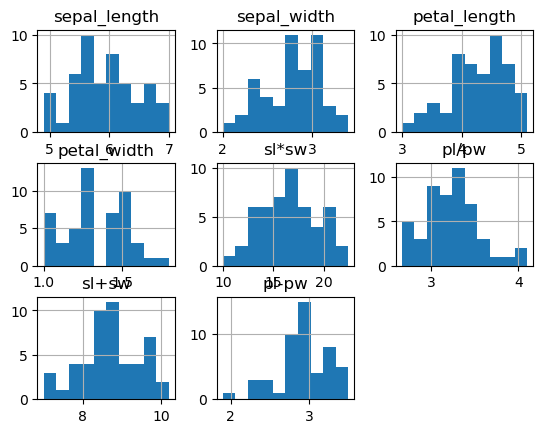

In [86]:
versicolor.hist()

array([[<AxesSubplot:title={'center':'sepal_length'}>]], dtype=object)

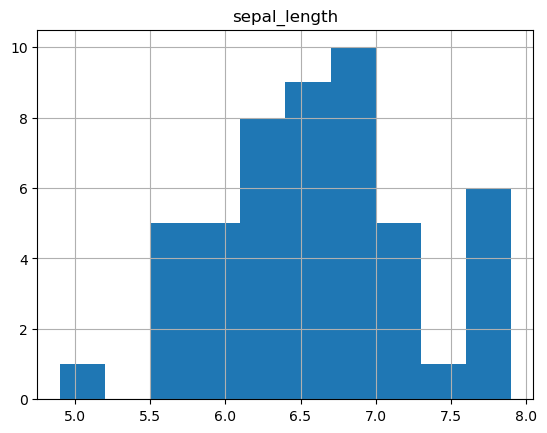

In [87]:
virginica.hist('sepal_length')
  
# Creating histogram 
#fig, ax = plt.subplots(1, 1) 
#ax.hist(virginica('sepal_length'))
  
# Set title 
#ax.virginica.set_title("Sepal length of Virginica Flower") 
  
# adding labels 
#ax.virginica.set_xlabel('Sepal length (mm)') 
#ax.virginica.set_ylabel('Frequency') 

#plt.show()

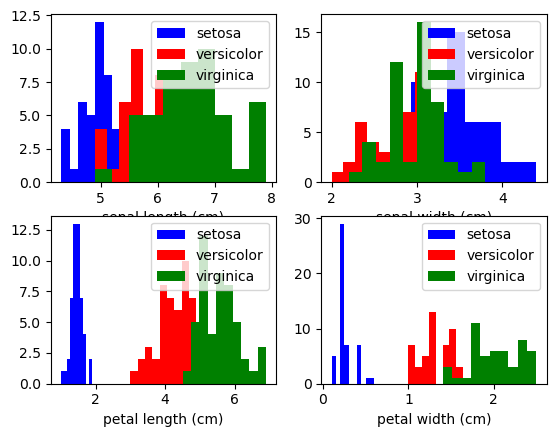

In [88]:
iris= datasets.load_iris()

fig, axes = plt.subplots(nrows= 2, ncols=2)
colors= ['blue', 'red', 'green']

for i, ax in enumerate(axes.flat):
    for label, color in zip(range(len(iris.target_names)), colors):
        ax.hist(iris.data[iris.target==label, i], label=             
                            iris.target_names[label], color=color)
        ax.set_xlabel(iris.feature_names[i])  
        ax.legend(loc='upper right')
        plt.savefig('./img/histogram.png')

plt.show()
plt.close()


## CONCLUSION

# Research / References
[1] pandas.DataFrame.size, NumFOCUS, Inc.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.size.html#pandas.DataFrame.size

[2]Scatter plot, Gabriel Mulligan
https://github.com/gabrielmulligan/fishersirisdataset/blob/master/fisher_scatterplot.py

[3]I want to read in a file from the command line in python, Stackoverflow
https://stackoverflow.com/questions/7439145/i-want-to-read-in-a-file-from-the-command-line-in-python

[4]Python – Basics of Pandas using Iris Dataset, GeeksforGeeks
https://www.geeksforgeeks.org/python-basics-of-pandas-using-iris-dataset/

[5]Python | Pandas DataFrame.columns
https://www.geeksforgeeks.org/python-pandas-dataframe-columns/

[6]Your Guide to the Python print() Function, Real Python
https://realpython.com/python-print/

[7]How to print a specific row of a pandas DataFrame?, Stackoverflow 
https://stackoverflow.com/questions/43772362/how-to-print-a-specific-row-of-a-pandas-dataframe

[8]pandas.DataFrame.head, NumFOCUS, Inc.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

[9]How to calculate summary statistics, NumFOCUS, Inc.
https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html

[10]pandas.DataFrame.tail, NumFOCUS, Inc.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail

[11]pandas.core.groupby.DataFrameGroupBy.sum, NumFOCUS, Inc. 
https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.sum.html

[12]Python | Pandas Dataframe.sample(), GeeksforGeeks
https://www.geeksforgeeks.org/python-pandas-dataframe-sample/

[13]*Pandas DataFrame iloc Property*, W3 Schools
https://www.w3schools.com/python/pandas/ref_df_iloc.asp

[14]pandas.DataFrame.replace, NumFOCUS, Inc.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html?